# Astronomia Computacional (AST3007)
Exemplo de como estimar incertezas com simulação de Monte-Carlo

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit

Partindo dos dados medidos $x \pm \Delta x$ e $y \pm \Delta y$, a que ajustamos uma reta $y(x)= a_0 + a_1 \ x$, iremos estimar a incerteza associada aos pârametros da reta usando simulação de Monte-Carlo.

Primeiro definimos a função a ajustar:

In [2]:
def fitfun (x,a0,a1):
    return a0+a1*x

Agora obtemos os dados experimentais e a incerteza na medida:

In [3]:
# Aqui temos os dados:
xx=  np.array([0.77 , 2.13 , 4.27 , 5.30 , 7.02 , 8.71 ,10.01,13.01, 14.1])
xerr=np.array([0.37 , 0.33 , 0.47 , 0.69 , 0.53 , 0.71 , 0.81, 0.82, 0.71])
yy=  np.array([0.89 , 3.15 , 4.17 , 7.51 , 6.57 , 9.70 , 9.52,12.58, 14.3])
yerr=np.array([0.42 , 0.38 , 0.68 , 0.80 , 0.27 , 0.31 , 0.88, 0.79, 0.69])
npoints=len(xx)
print(' Numero de pontos experimentais = ',npoints)

 Numero de pontos experimentais =  9


Comecemos por obter um ajuste aos dados medidos (sem ter em conta os erros). O resultado é a melhor reta (que ignora os eventuais erros cometidos nas medidas de $x$ e de $y$):

 Parâmetros do ajuste: a_0 = 0.8062530751889085 ,   a_1 = 0.935911241958642


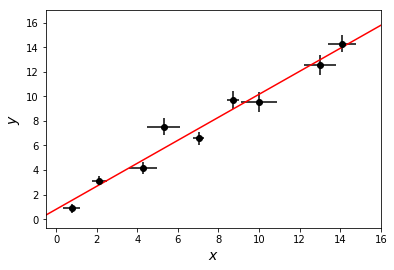

Melhor reta:  y = 0.8062530751889085 + 0.935911241958642  x


In [4]:
# Primeiro obtemos os parâmetros que melhor ajsutam os dados:
par = curve_fit(fitfun, xx, yy)
[a0ref, a1ref] = par[0]
print(' Parâmetros do ajuste: a_0 =',a0ref,',   a_1 =',a1ref)

plt.errorbar(xx, yy, xerr, yerr,'o',color='black',aa=True)

xmin=-0.5
xmax=16.
ymin=-0.7
ymax=17.0

xnp=np.concatenate(([xmin], xx, [xmax]), axis=None)
fit0 = fitfun(xnp,a0ref,a1ref)
plt.plot(xnp,fit0,'red',aa=True)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.savefig('Figura_1.pdf', orientation='landscape',format='pdf')
plt.show()
print('Melhor reta:  y =',a0ref,'+',a1ref,' x')

De forma a estimar o impacto dos erros de medida no resultado $(a_0,a_1)$, vamos gerar $N_t$ tabelas de medidas tendo em conta que cada uma delas:
$$x_n(i) = x(i) + \sigma[x(i)] * Normal(mean=0,sigma=1)$$
$$y_n(i) = y(i) + \sigma[y(i)] * Normal(mean=0,sigma=1)$$
Com esta nova tabela podemos calcular novamente o valor de $(a_n,b_n)$, juntando assim $Nt$ medidas dos dois parâmetros.

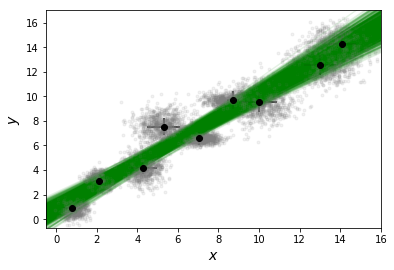

In [5]:
Nt=1000
a0=np.zeros(Nt,float)
a1=np.zeros(Nt,float)

for i in range(0, Nt):
    xn=xx+xerr*np.random.normal(size=npoints)
    yn=yy+yerr*np.random.normal(size=npoints)
    plt.plot(xn,yn,'.',color='gray',alpha=0.1)
    par = curve_fit(fitfun, xn, yn)
    [aa0, aa1] = par[0]
    a0[i]=aa0
    a1[i]=aa1
    xnp=np.concatenate(([xmin], xn, [xmax]), axis=None)
    fit = fitfun(xnp, aa0, aa1)
    plt.plot(xnp,fit,color='green',alpha=0.1)

plt.errorbar(xx, yy, xerr, yerr,'o',color='black',aa=True,alpha=1.0)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.savefig('Figura_2.pdf', orientation='landscape',format='pdf')
plt.show()

Agora basta usar os $N_t$ valores para estimar as incertezas $(\Delta a_0, \Delta a_1)$ associadas aos parâmetros $(a_0,a_1)$ da melhor reta:

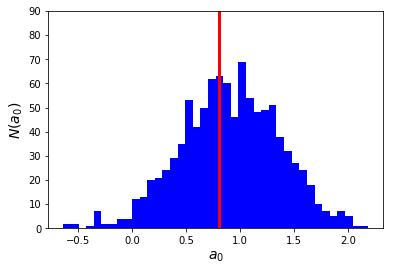

Mean (a_0) = 0.9048113793724792    Sig (a_0) = 0.4612204411260955


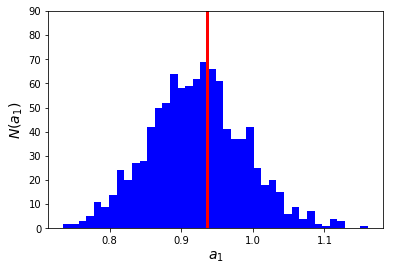

Mean (a_1) = 0.9218930142149215    Sig (a_1) = 0.06757159449739591


In [6]:
num_bins = 40

n, bins, patches = plt.hist(a0, num_bins, facecolor='blue')
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$N(a_0)$', fontsize=14)
ymin=0.0
ymax=90.0
plt.plot([a0ref,a0ref],[ymin,ymax],'red',aa=True,lw=3)
plt.ylim(ymin,ymax)
plt.savefig('Figura_3.pdf', orientation='landscape',format='pdf')
plt.show()
a0mean=np.mean(a0)
a0sig=np.std(a0)
print('Mean (a_0) =',a0mean,'   Sig (a_0) =',a0sig)

n, bins, patches = plt.hist(a1, num_bins, facecolor='blue')
a1mean=np.mean(a1)
a1sig=np.std(a1)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$N(a_1)$', fontsize=14)
plt.plot([a1ref,a1ref],[ymin,ymax],'red',aa=True,lw=3)
plt.ylim(ymin,ymax)
plt.savefig('Figura_4.pdf', orientation='landscape',format='pdf')
plt.show()
print('Mean (a_1) =',a1mean,'   Sig (a_1) =',a1sig)

O resultado final é então dado por:

In [7]:
print('Melhor reta:  y(x) = [',a0ref,'+-',a0sig,']  +  [',a1ref,'+-',a1sig,'] x')

Melhor reta:  y(x) = [ 0.8062530751889085 +- 0.4612204411260955 ]  +  [ 0.935911241958642 +- 0.06757159449739591 ] x


Agora, vejamos a matriz de correlações que nos permite avaliar se os dois parâmetros $a_0,a_1)$ usados são efetivamente independentes.

In [8]:
corr=np.array([0.0, 0.0, 0.0])

for i in range(0, Nt):
    corr[0]=corr[0]+(a0[i]-a0ref)*(a0[i]-a0ref)
    corr[1]=corr[1]+(a1[i]-a1ref)*(a1[i]-a1ref)
    corr[2]=corr[2]+(a0[i]-a0ref)*(a1[i]-a1ref)

corr=corr/(Nt-2.)

print(' Sig(a_0)  =', np.sqrt(corr[0]))
print(' Sig(a_1)  =', np.sqrt(corr[1]))
print(' Parâmetro de correlação (a_0,a_1)  =', corr[2]/np.sqrt(corr[0]*corr[1]))

 Sig(a_0)  = 0.47210571087477077
 Sig(a_1)  = 0.06907948351051477
 Parâmetro de correlação (a_0,a_1)  = -0.8256378234904269


Como o parâmetro de correlação é significtaivamente diferente de zero, tal signiifca que os parâmetros não são independentes. Consequentemente, a estima do erro tem que ter em conta essa correlação.

Representemos os valores obtidos dos dois parâmetros para verificar visualmente a correlação medida acima.

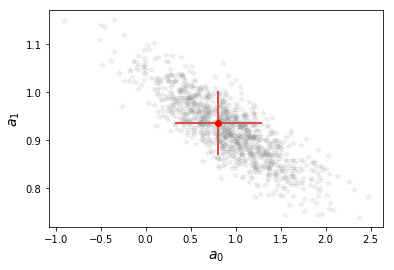

In [11]:
#plt.plot([a0mean],[a1mean],'o',color='black',alpha=1.0)
xp=np.array([a0ref])
yp=np.array([a1ref])
xep=np.array([a0sig])
yep=np.array([a1sig])
plt.errorbar(xp, yp, yep, xep, 'o',color='red',aa=True,alpha=1.0)
plt.plot(a0,a1,'*',color='gray',alpha=0.1)

plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.savefig('Figura_5.pdf', orientation='landscape',format='pdf')
plt.show()

O gráfico mostra a correlação, confirmando que temos valores maiores de $a_0$ quando o valor de $a_1$ é menor. Neste caso o valor de $\sigma(a_i)$ usado não é suficiente para representar a incerteza associada aos parâmetros e que resultados dados iniciais.

Uma possibilidade é redefinir a função a ajustar de forma a encontrar uma nova função linear de dois parâmetros, onde estes sejam efetivamente linearmente independentes.

# Exercício:

Repita o mesmo processo, mas agora reduzindo os dados como sendo $$x_{new}=x \; - <x>$$ e $$y_{new}=y \;- <y>$$